<a href="https://colab.research.google.com/github/boredanon/machine-learning2023-2/blob/main/S09-Support-Vector-Machines/S09_LAB_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nombre:** José del Solar Zavala

**Fecha:** 20/10/23

**Módulo:** Machine Learning


# Enunciado: Laboratorio de Máquinas de Soporte Vectorial en Python

## Objetivo
El objetivo de este laboratorio es experimentar con un conjunto de datos artificial que sigue una distribución Gaussiana creada por el programador. Utilizaremos el kernel Gaussiano para aprender la estructura utilizando máquinas de Soporte Vectorial.


## Etapas Metodológicas

Se deben seguir las siguientes cinco etapas metodológicas:

1. **Obtención de datos**: Generar un conjunto de datos artificial siguiendo una distribución Gaussiana.

2. **Manipulación**: Dividir el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

3. **Exploración**: Visualizar los datos para entender la distribución y la relación entre las categorías.

4. **Modelamiento**: Implementar un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

5. **Interpretación**: Analizar y discutir los resultados obtenidos, incluyendo las estadísticas de clasificación y los parámetros ajustados.

## Instrucciones

1. Crea un Jupyter notebook para llevar a cabo el laboratorio.

2. Genera un conjunto de datos artificial que siga una distribución Gaussiana concéntrica.

3. Divide el conjunto de datos en conjuntos de entrenamiento, prueba y validación.

4. Grafica los conjuntos de datos, asignando el color rojo a una categoría y el color azul a la otra.

5. Entrena un clasificador de Máquinas de Soporte Vectorial utilizando el kernel Gaussiano.

6. Muestra las estadísticas de clasificación (precisión, recall, F1-score, etc.).

7. Realiza ajustes en los parámetros del clasificador y documenta los cambios en el rendimiento.

8. Interpreta los resultados y concluye sobre la eficacia del modelo.

9. Entrega el Jupyter notebook con todos los pasos y explicaciones detalladas.

Recuerda documentar cada paso y proporcionar explicaciones claras y concisas en tu notebook. ¡Buena suerte!

plt.title("Gaussian divided into three quantiles", fontsize="small")
X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3)
plt.scatter(X1[:, 0], X1[:, 1], marker="o", c=Y1, s=25, edgecolor="k")

# Desarrollo

Si puede ver este archivo, significa que ya se cumplió
"1. Crear un Jupyter Notebook para llevar a cabo el laboratorio".

## Paso 1: Obtención de datos.

Para que se cumpla el paso 1, se debe completar el punto 2 de la tarea de generar el conjunto de datos artificial que siga una distribución Gaussiana concéntrica.

Primero, me gusta dejar la importación de las librerías a utilizar en su propio bloque.

Luego de esto, se "importarán" los datos.

In [2]:
from sklearn.datasets import make_gaussian_quantiles #I guess this is to obtain the data.
import matplotlib.pyplot as plt # Plots!
import numpy as np # Linear algebra.

Ahora se generarán los datos, estos deben seguir una distribución gaussiana concéntrica.

In [3]:
#Generate 2D normally distributed data
X, Y = make_gaussian_quantiles(cov=2., n_samples=1000, n_features=2, n_classes=2
                               , random_state=1902)

Con esto hecho, se cumple el punto: "2. Genera un conjunto de datos artificial que siga una distribución Gaussiana concéntrica".

## Paso 2: Manipulación de datos.

El siguiente paso es de la manipulación de datos, donde se tomarán los sets de test, training y validation. Para esto necesitamos el método train_test_split de sklearn.

In [4]:
from sklearn.model_selection import train_test_split

Ahora se procederá a hacer cada set.

Si dividimos el 100% de los datos en 80% training y 20% test, podemos dividir nuevamente los datos de entrenamiento en 75% training y 25% validación.

Como $0.25 × 0.8 = 0.2$, entonces el 20% de los datos totales quedan como validación, el 20% de los datos totales quedan de test y el 60% de los datos totales quedan de entrenamiento.

Esto se logra llamando a train_test_split dos veces, a continuación.

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=1902)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.25, random_state=1902)

Con esto, la manipulación de datos está completa y el punto "3. Divide el conjunto de datos en conjuntos de entrenamiento, prueba y validación".

## Paso 3: Exploración



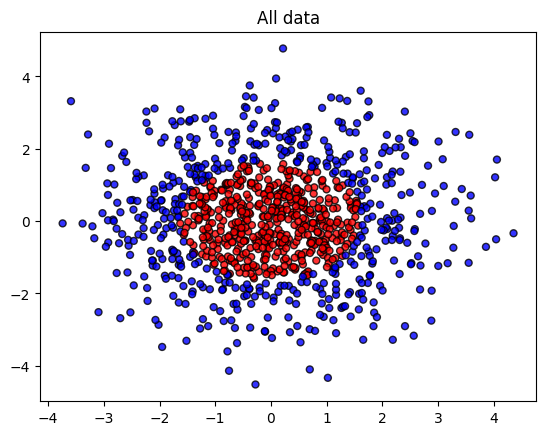

In [6]:
colors = ['red' if y == 0 else 'blue' for y in Y]
plt.scatter(X[:, 0], X[:, 1], marker='o', c=colors, s=25, edgecolor='k', alpha=0.8)
plt.title("All data")
plt.show()

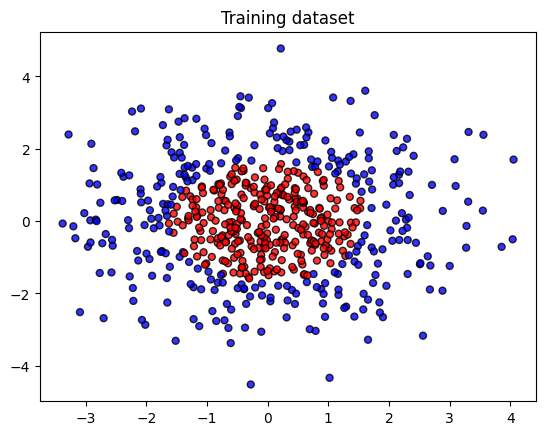

In [7]:
colors = ['red' if y == 0 else 'blue' for y in Y_train]
plt.title("Training dataset")
plt.scatter(X_train[:, 0], X_train[:,1], marker='o', c=colors, s=25, edgecolor='k', alpha=0.8)
plt.show()

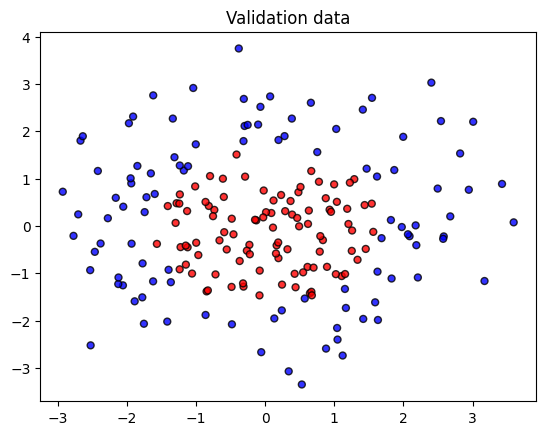

In [8]:
colors = ['red' if y == 0 else 'blue' for y in Y_val]
plt.scatter(X_val[:, 0], X_val[:, 1], marker='o', c=colors, s=25, edgecolor='k', alpha=0.8)
plt.title("Validation data")
plt.show()

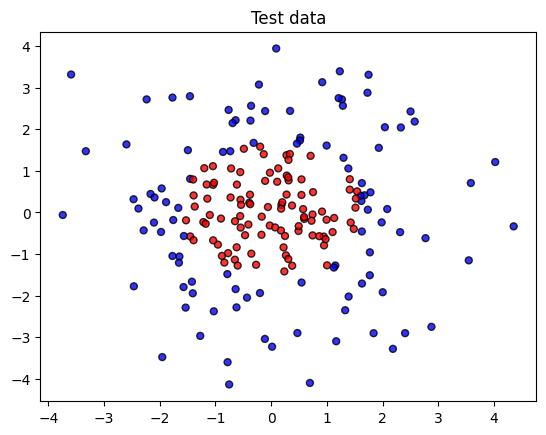

In [9]:
colors = ['red' if y== 0 else 'blue' for y in Y_test]
plt.scatter(X_test[:,0], X_test[:,1], marker='o', c=colors, s=25, edgecolor='k', alpha=0.8)
plt.title("Test data")
plt.show()

## Paso 4: Modelamiento

In [10]:
from sklearn.svm import SVC

In [76]:
model = SVC(kernel='rbf', C=1E10)
model.fit(X_train, Y_train)

SVC(C=10000000000.0)

In [77]:
Y_pred_val = model.predict(X_val)
Y_pred = model.predict(X_test)

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [79]:
acc_val = accuracy_score(Y_val, Y_pred_val)
f1_val = f1_score(Y_val, Y_pred_val)
rec_val = recall_score(Y_val, Y_pred_val)

acc_test = accuracy_score(Y_test, Y_pred)
f1_test = f1_score(Y_test, Y_pred)
rec_test = recall_score(Y_test, Y_test)

print(f"Accuracy on validation data: {acc_val}")
print(f"F1 score on validation data: {f1_val}")
print(f"Recall score on validation data: {rec_val}")
print("\n")
print(f"Accuracy on test data: {acc_test}")
print(f"F1 score on test data: {f1_test}")
print(f"Recall score on test data: {rec_test}")

Accuracy on validation data: 1.0
F1 score on validation data: 1.0
Recall score on validation data: 1.0


Accuracy on test data: 0.99
F1 score on test data: 0.9902912621359222
Recall score on test data: 1.0


In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [38]:
pca = RandomizedPCA(n_components=150, whiten=True, random_state=1902)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [81]:
param_grid = {'C': [1e2, 1e4, 1e6, 1e8, 1e10], 'gamma': [1e-2, 1e-1, 1e1, 1e2]}

grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, Y_train)
print(grid.best_params_)


CPU times: user 1.59 s, sys: 3.81 ms, total: 1.6 s
Wall time: 1.61 s
{'C': 10000.0, 'gamma': 0.01}


In [82]:
model = grid.best_estimator_
Y_pred_val = model.predict(X_val)
Y_pred = model.predict(X_test)


acc_val = accuracy_score(Y_val, Y_pred_val)
f1_val = f1_score(Y_val, Y_pred_val)
rec_val = recall_score(Y_val, Y_pred_val)

acc_test = accuracy_score(Y_test, Y_pred)
f1_test = f1_score(Y_test, Y_pred)
rec_test = recall_score(Y_test, Y_test)

print(f"Accuracy on validation data: {acc_val}")
print(f"F1 score on validation data: {f1_val}")
print(f"Recall score on validation data: {rec_val}")
print("\n")
print(f"Accuracy on test data: {acc_test}")
print(f"F1 score on test data: {f1_test}")
print(f"Recall score on test data: {rec_test}")



Accuracy on validation data: 0.995
F1 score on validation data: 0.9950248756218906
Recall score on validation data: 0.9900990099009901


Accuracy on test data: 0.995
F1 score on test data: 0.9951219512195122
Recall score on test data: 1.0


## Paso 5: Interpretación